In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('NBA_Player_Stats_2_Proper Colum Names.csv')

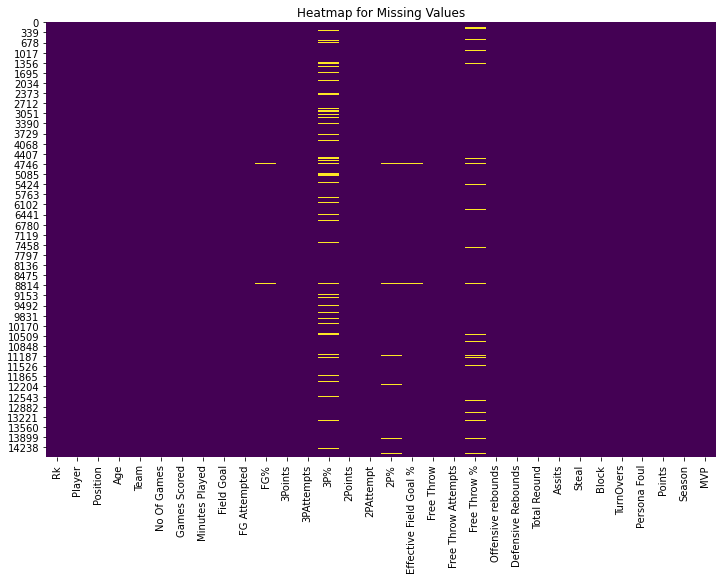

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap for Missing Values')
plt.show()

Generates a heatmap to visually inspect missing values in the dataset. The 'viridis' colormap is used, and the color bar is omitted for better visibility. The resulting heatmap allows for a quick assessment of missing data patterns.


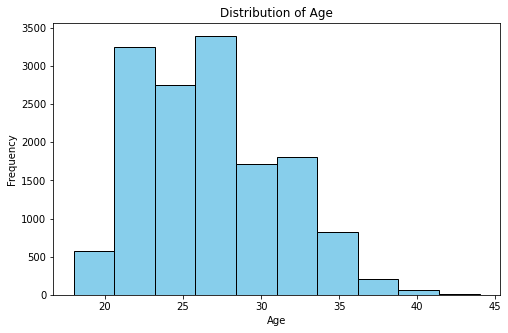

In [38]:
# Summary statistics
summary_stats = df.describe()

# Visualize the distribution of 'Age'
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Computes basic descriptive statistics for numeric columns using the 'describe' method and presents the distribution of the 'Age' column through a histogram.

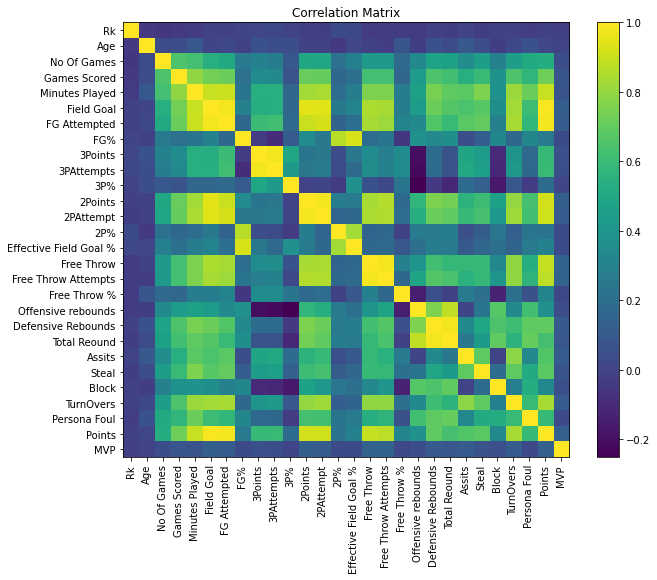

In [40]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

Here, a correlation matrix is computed for numeric columns, and a heatmap is generated to visualize the strength and direction of relationships between variables.

In [41]:
print(summary_stats)

                 Rk           Age   No Of Games  Games Scored  Minutes Played  \
count  14573.000000  14573.000000  14573.000000  14573.000000    14573.000000   
mean     244.332876     26.705483     45.544500     21.565429       19.623626   
std      139.596859      4.252495     26.110389     27.035594        9.957188   
min        1.000000     18.000000      1.000000      0.000000        0.000000   
25%      124.000000     23.000000     22.000000      0.000000       11.400000   
50%      243.000000     26.000000     48.000000      7.000000       18.900000   
75%      361.000000     30.000000     70.000000     39.000000       27.700000   
max      605.000000     44.000000     85.000000     83.000000       43.700000   

         Field Goal  FG Attempted           FG%       3Points    3PAttempts  \
count  14573.000000  14573.000000  14485.000000  14573.000000  14573.000000   
mean       2.932046      6.598586      0.432377      0.590894      1.703637   
std        2.133970      4.541544

A quick summary stats for a dataset

In [42]:
# Assuming 'FG%' is the column with missing values
mean_fg_percentage = df['FG%'].mean()
df['FG%'].fillna(mean_fg_percentage, inplace=True)

mean_fg_percentage = df['3P%'].mean()
df['3P%'].fillna(mean_fg_percentage, inplace=True)

mean_fg_percentage = df['2P%'].mean()
df['2P%'].fillna(mean_fg_percentage, inplace=True)

mean_fg_percentage = df['Effective Field Goal %'].mean()
df['Effective Field Goal %'].fillna(mean_fg_percentage, inplace=True)

mean_fg_percentage = df['Free Throw %'].mean()
df['Free Throw %'].fillna(mean_fg_percentage, inplace=True)


Missing values in percentage columns ('FG%', '3P%', '2P%', 'Effective Field Goal %', 'Free Throw %') are filled with the mean values of their respective columns.

In [52]:
df.isnull().sum()

Rk                        0
Player                    0
Position                  0
Age                       0
Team                      0
No Of Games               0
Games Scored              0
Minutes Played            0
Field Goal                0
FG Attempted              0
FG%                       0
3Points                   0
3PAttempts                0
3P%                       0
2Points                   0
2PAttempt                 0
2P%                       0
Effective Field Goal %    0
Free Throw                0
Free Throw Attempts       0
Free Throw %              0
Offensive rebounds        0
Defensive Rebounds        0
Total Reound              0
Assits                    0
Steal                     0
Block                     0
TurnOvers                 0
Persona Foul              0
Points                    0
Season                    0
MVP                       0
dtype: int64

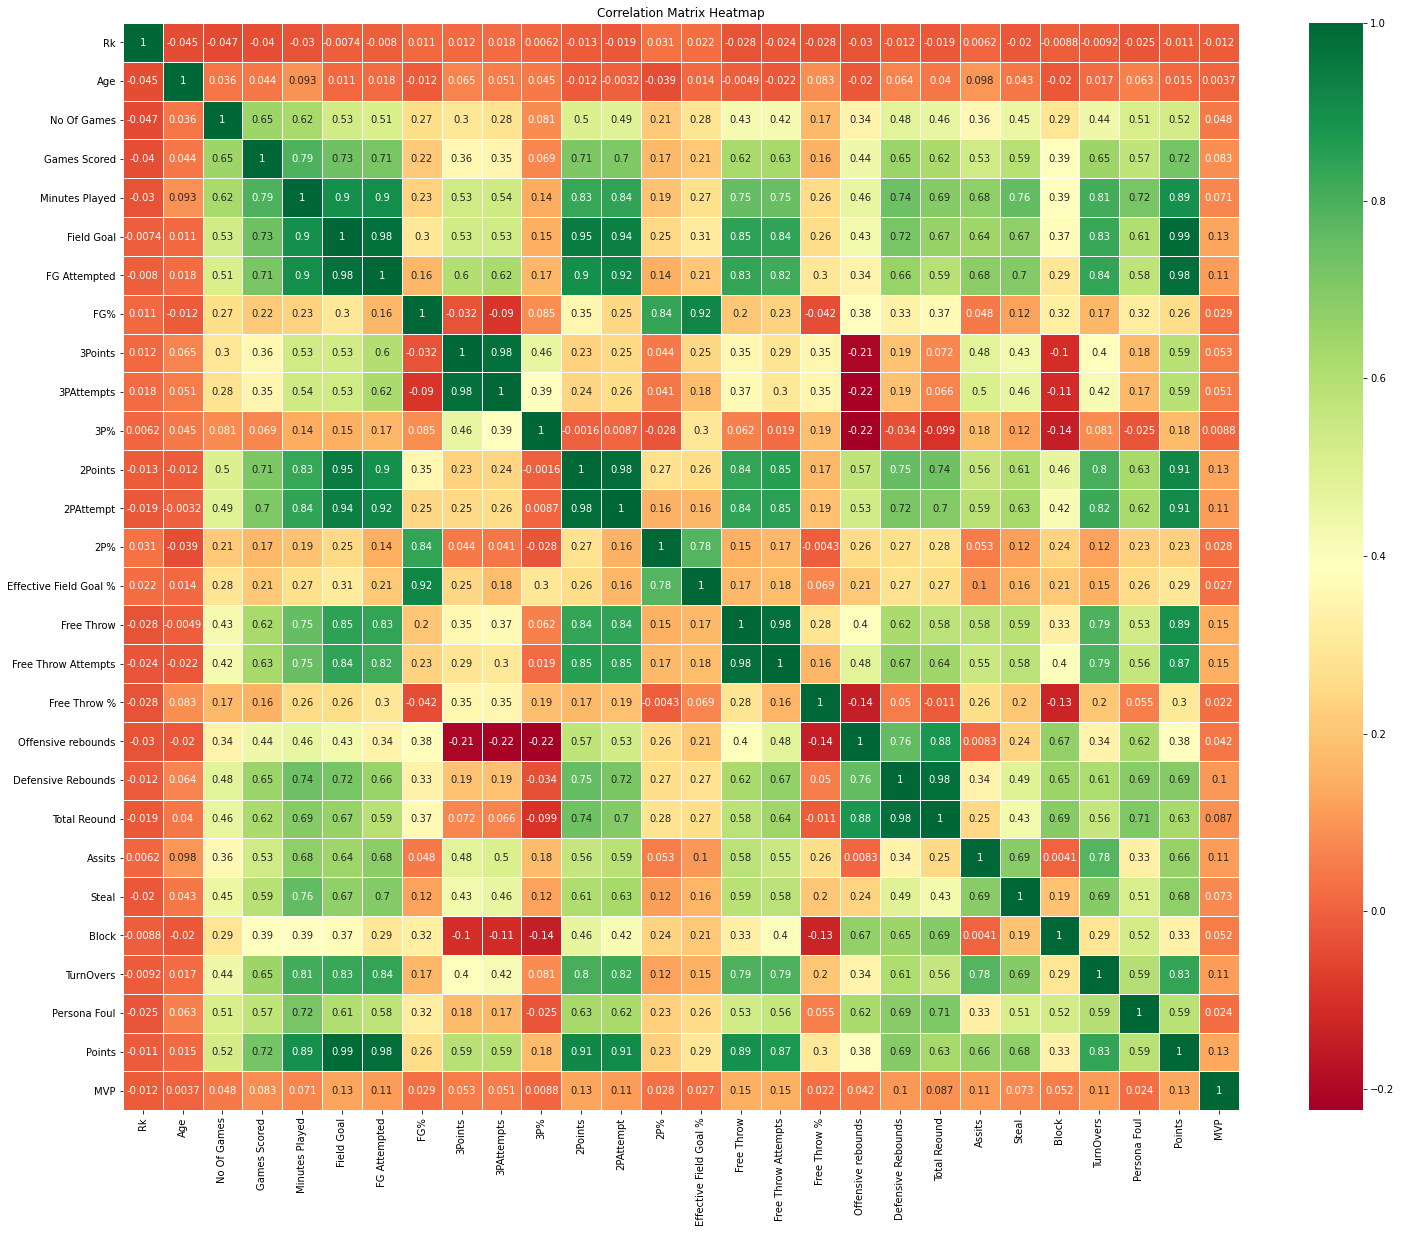

In [43]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 20))

# Create a heatmap with a color map
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

Generates a larger correlation matrix heatmap with annotations and color coding to highlight positive (green) and negative (red) correlations.

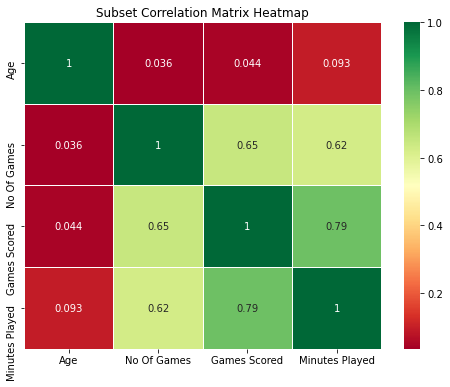

In [44]:
subset_corr = df[['Age', 'No Of Games', 'Games Scored', 'Minutes Played']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Subset Correlation Matrix Heatmap')
plt.show()

A subset of the correlation matrix focusing on specific columns is created and visualized with a heatmap.

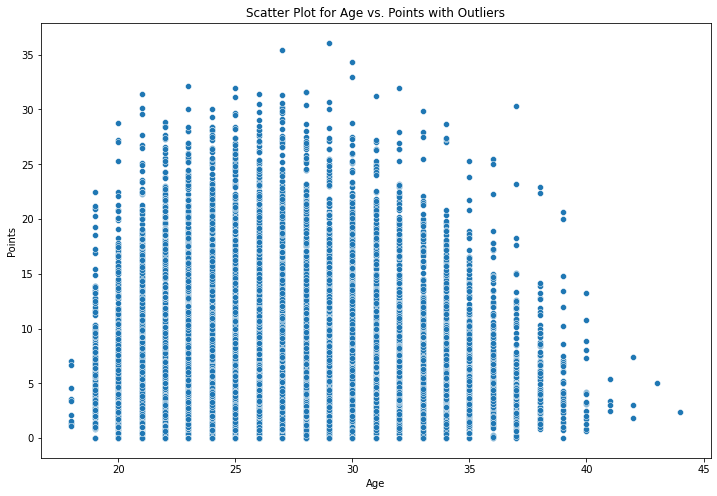

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Points', data=df)
plt.title('Scatter Plot for Age vs. Points with Outliers')
plt.show()


The first part creates a scatter plot to explore the relationship between 'Age' and 'Points.' The second part generates a violin plot to showcase the distribution of ages by player positions.

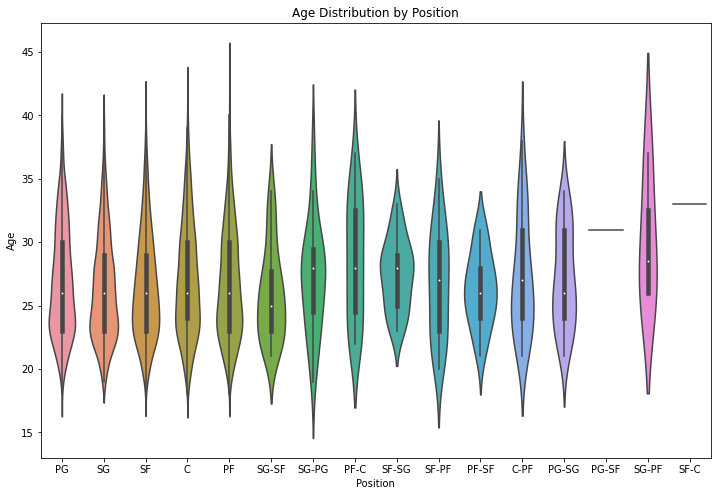

In [49]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='Age', data=df)
plt.title('Age Distribution by Position')
plt.show()


Mean Squared Error: 6.78
Predicted Points for 25 Minutes Played and 0.45% FG: 10.57


C:\Users\91877\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


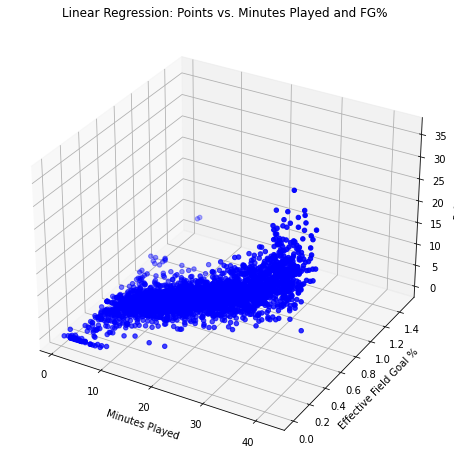

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Features and target variable
X = df[['Minutes Played', 'Effective Field Goal %']]
y = df['Points']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Function to test predictions
def test_prediction(minutes_played, field_goal_percentage):
    predicted_points = model.predict([[minutes_played, field_goal_percentage]])
    return predicted_points[0]

# Test the prediction function with sample input values
minutes_played_input = 25
field_goal_percentage_input = 0.45
predicted_points_output = test_prediction(minutes_played_input, field_goal_percentage_input)
print(f'Predicted Points for {minutes_played_input} Minutes Played and {field_goal_percentage_input}% FG: {predicted_points_output:.2f}')

# Visualize the regression plane in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Minutes Played'], X_test['Effective Field Goal %'], y_test, color='blue', label='Actual Points')
ax.set_xlabel('Minutes Played')
ax.set_ylabel('Effective Field Goal %')
ax.set_zlabel('Points')
ax.set_title('Linear Regression: Points vs. Minutes Played and FG%')
plt.show()

A simple linear regression model is built using the features 'Minutes Played' and 'Effective Field Goal %' to predict the 'Points.' The model is then evaluated using mean squared error.

In [66]:
# Assuming you have a column 'MVP' indicating MVP status (1: MVP, 0: Not MVP)

from sklearn.ensemble import RandomForestClassifier
features =['Minutes Played','Field Goal','3Points','2Points','Points']

# Features and target variable
X_mvp = df[features]
y_mvp = df['MVP']

# Split the dataset into training and testing sets
X_train_mvp, X_test_mvp, y_train_mvp, y_test_mvp = train_test_split(X_mvp, y_mvp, test_size=0.2, random_state=42)

# Create a classification model (e.g., Random Forest Classifier)
model_mvp = RandomForestClassifier(random_state=42)

# Train the model on the training set
model_mvp.fit(X_train_mvp, y_train_mvp)





# Make predictions on the testing set
y_pred_mvp = model_mvp.predict(X_test_mvp)


sample_input_mvp = 19,23,30,46,67;
predicted_mvp_status = model_mvp.predict([sample_input_mvp])
print(f'Predicted MVP Status: {predicted_mvp_status[0]}')


sample_input_mvp = 1,13,40,51,27;
predicted_mvp_status = model_mvp.predict([sample_input_mvp])
print(f'Predicted MVP Status: {predicted_mvp_status[0]}')


sample_input_mvp = 29,13,3,16,21;
predicted_mvp_status = model_mvp.predict([sample_input_mvp])
print(f'Predicted MVP Status: {predicted_mvp_status[0]}')


sample_input_mvp = 15,33,60,56,57;
predicted_mvp_status = model_mvp.predict([sample_input_mvp])
print(f'Predicted MVP Status: {predicted_mvp_status[0]}')

Predicted MVP Status: True
Predicted MVP Status: False
Predicted MVP Status: False
Predicted MVP Status: True


C:\Users\91877\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91877\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91877\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91877\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


This section performs MVP prediction using a Random Forest Classifier. Features include 'Minutes Played,' 'Field Goal,' '3Points,' '2Points,' and 'Points.' A sample input is provided to demonstrate predictions.